<a href="https://colab.research.google.com/github/AryanJain2003/Data-Science-Certifications/blob/main/DataMiningProject(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***AIM***

1. To perform **Exploratory Data Analysis (Data Visualisation ) and Model Training (KNN, Random Forest, Decision Tree Classifier and Logistic Regression)** on a Diabetes dataset (containing different parameters such as Glucose, Blood Pressure, Skin Thickness, BMI, etc.) to predict Diabetes in an individual at early stages on the basis of Accuracy, Precision and F1-score of the models trained.

2. Compare the results of each model to find out which model outperforms other models.


***STEP 1 : IMPORT DIABETES DATASET***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import the diabetes dataset
diabetes_df = pd.read_csv('/content/diabetes (1).csv')

# Get the number of rows in the DataFrame
num_rows = len(diabetes_df)

# Get the number of columns in the DataFrame
num_columns = diabetes_df.shape[1]

# Print the size of the dataset in terms of rows and columns
print(f"Size of the dataset: {num_rows} rows, {num_columns} columns")

# Convert the Pandas DataFrame to a NumPy array
diabetes_array = diabetes_df.to_numpy()

Size of the dataset: 768 rows, 9 columns


***STEP 2 : DATA CLEANING AND DATA PREPROCESSING***

In [ ]:
# Data Cleaning

# Check for missing values
print(diabetes_df.isnull().sum())

# Remove rows with missing values
diabetes_df = diabetes_df.dropna()

# Data preprocessing

# Scale the data
scaler = StandardScaler()
diabetes_array = scaler.fit_transform(diabetes_array)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_array, diabetes_df['Outcome'], test_size=0.25, random_state=42)

# Save the preprocessed data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


***STEP 3 : EXPLORATORY DATA ANALYSIS USING DATA VISUALISATION***

**1. HISTOGRAM**

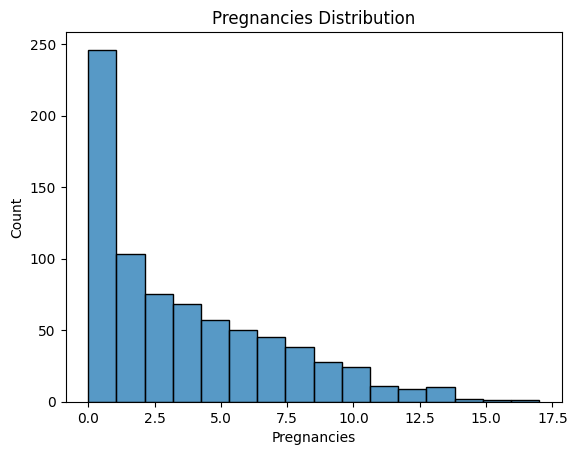

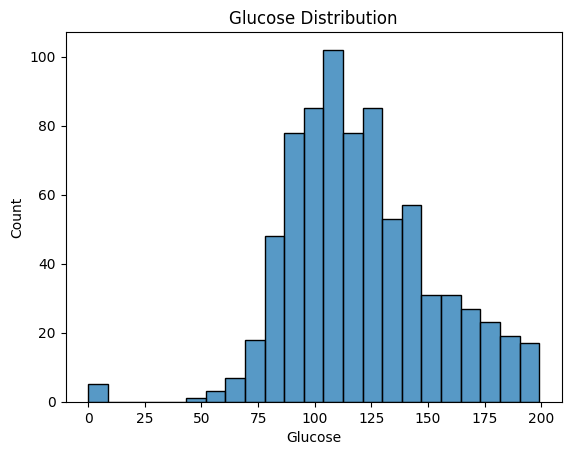

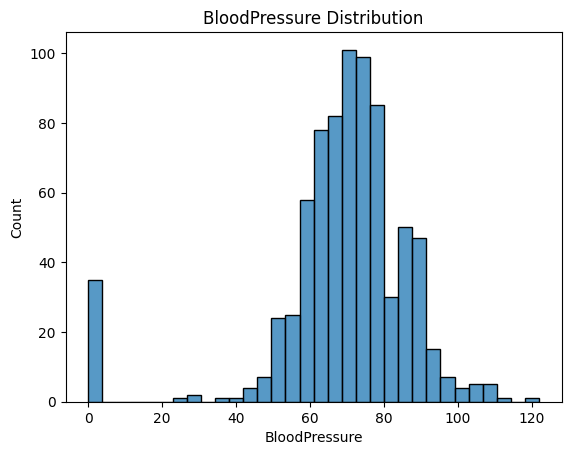

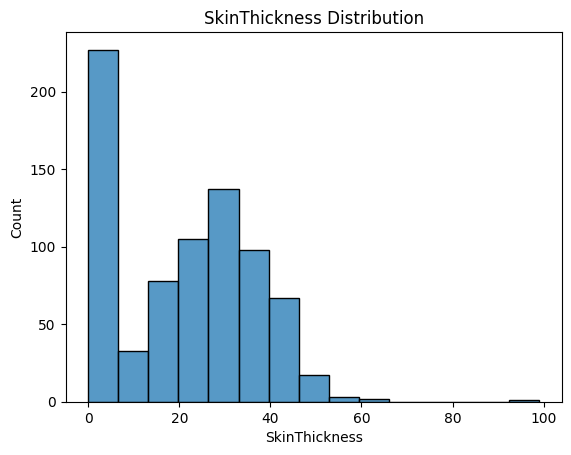

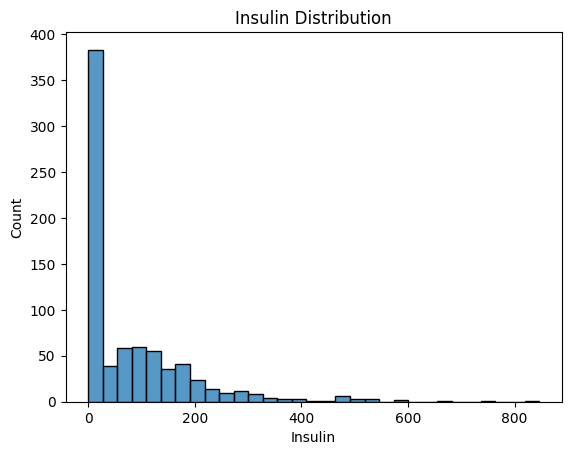

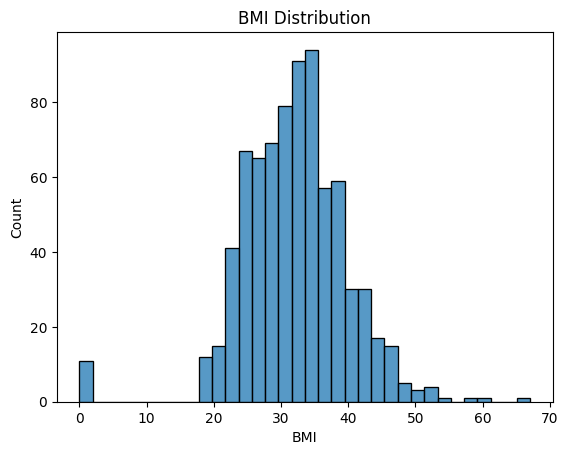

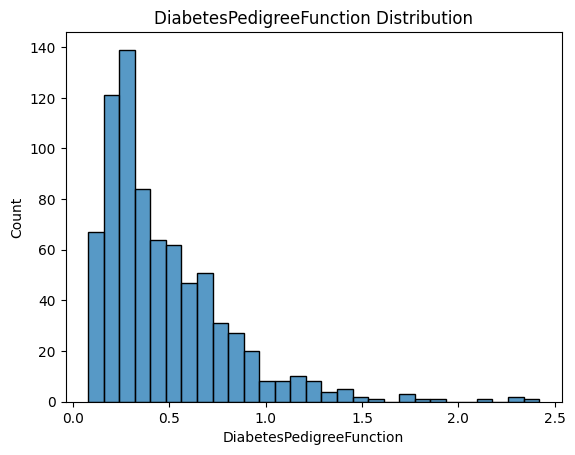

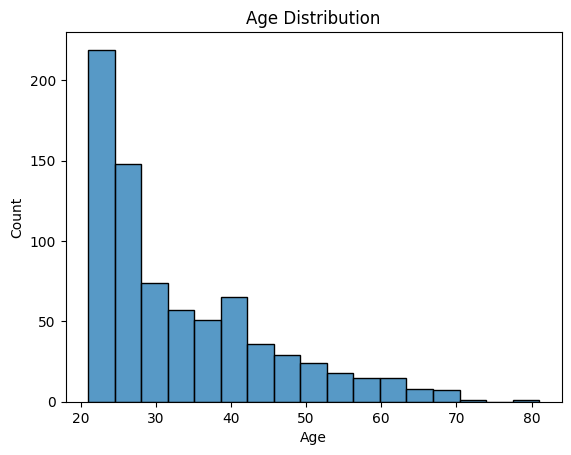

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for each continuous variable
continuous_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for variable in continuous_variables:
    sns.histplot(diabetes_df[variable])
    plt.title(variable + ' Distribution')
    plt.show()


*OBSERVATIONS:*

1. The distribution of most of the continuous variables is approximately normal.

2. The distribution of the SkinThickness variable is skewed to the right, with a few outliers.

3. The distribution of the Insulin variable is also skewed to the right, with a few outliers.

**2. HEATMAP**

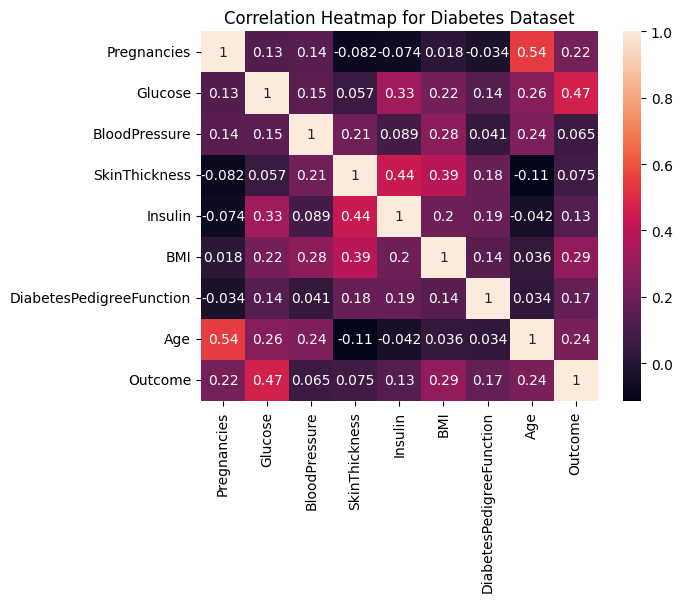

In [ ]:
# Create a heatmap to visualize the correlation between different variables
sns.heatmap(diabetes_df.corr(), annot=True)
plt.title('Correlation Heatmap for Diabetes Dataset')
plt.show()


A Heatmap can be used to visualize the correlation between different variables. The following heatmap shows the correlation between the different features in the diabetes dataset:

*OBSERVATIONS:*

1. The Outcome variable is positively correlated with the Glucose variable and the BMI variable.

2. The Outcome variable is negatively correlated with the Age variable.

3. The Glucose variable and the BMI variable are positively correlated.

**3. COUNT PLOT**

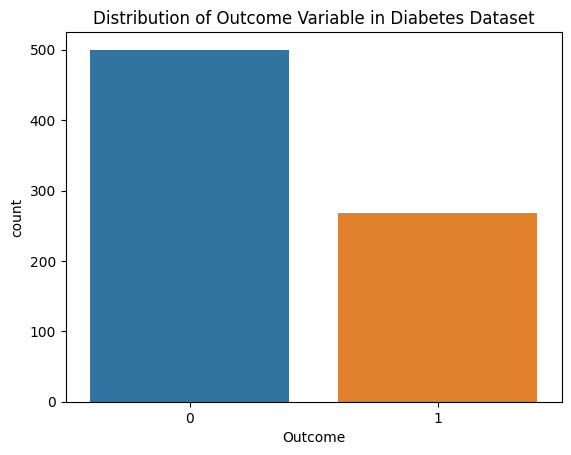

In [ ]:
# Create a count plot to visualize the distribution of the Outcome variable
sns.countplot(x='Outcome', data=diabetes_df)
plt.title('Distribution of Outcome Variable in Diabetes Dataset')
plt.show()

**4. PAIRPLOT**

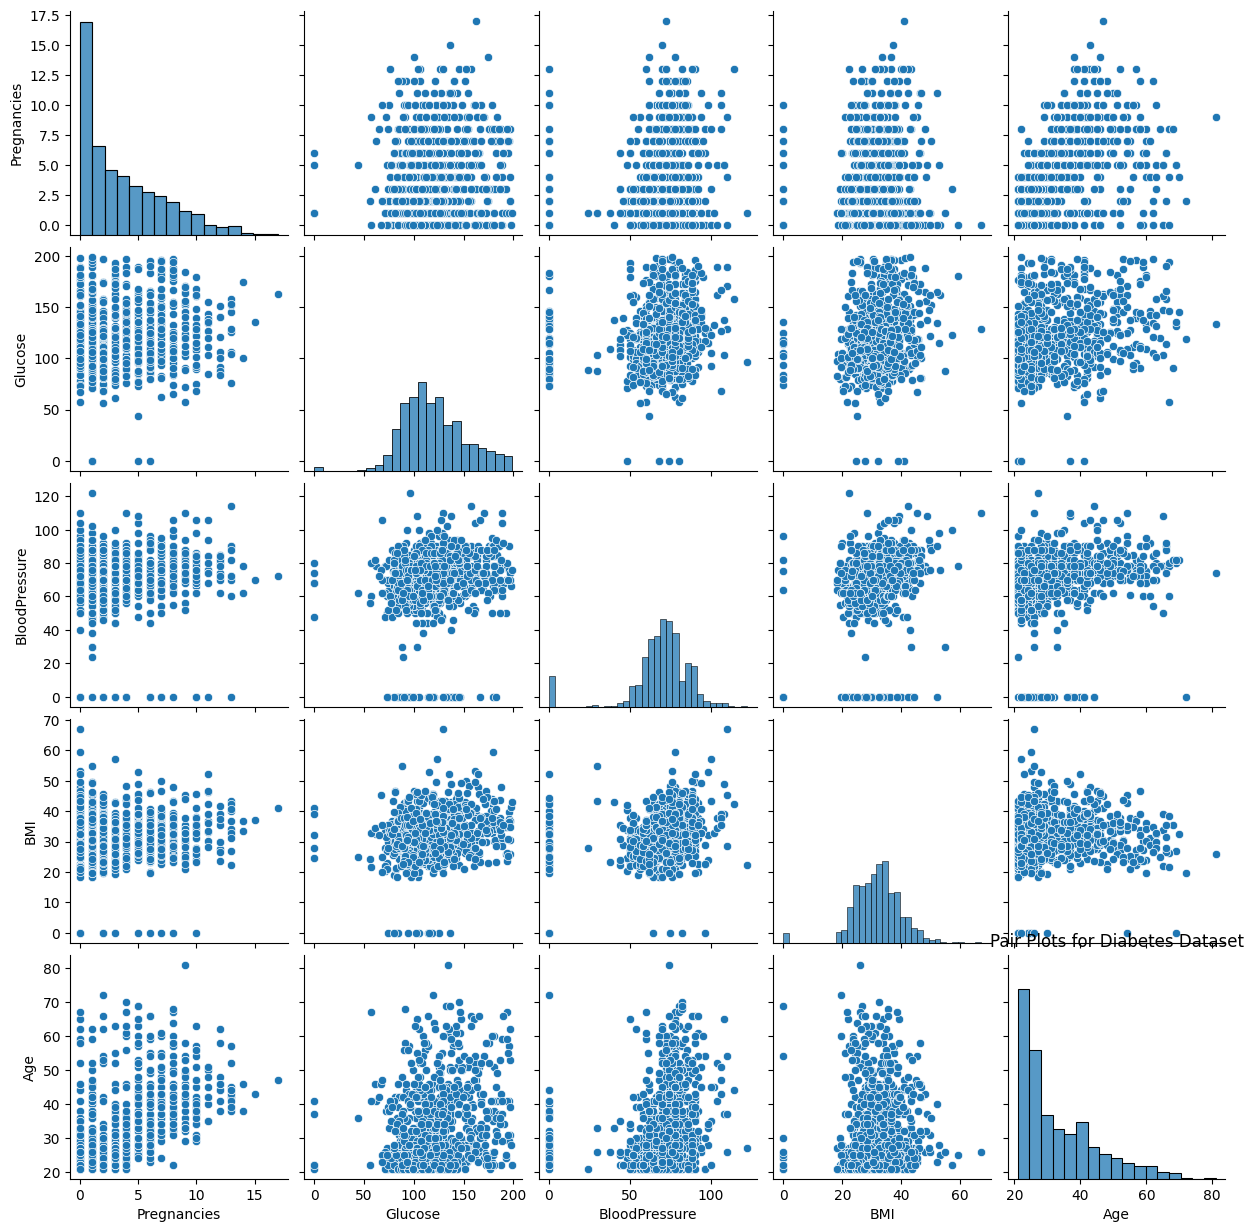

In [ ]:
# Create a pair plot to visualize the relationship between pairs of variables
pair_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']

sns.pairplot(diabetes_df, vars=pair_variables)
plt.title('Pair Plots for Diabetes Dataset')
plt.show()

Pair Plots can be used to visualize the relationship between pairs of variables.

*OBSERVATIONS:*

1. The Pregnancies variable and the Glucose variable are positively correlated.

2. The BloodPressure variable and the SkinThickness variable are positively correlated.

3. The Insulin variable and the BMI variable are positively correlated.

4. The DiabetesPedigreeFunction variable and the Age variable are positively correlated.

Overall, the exploratory data analysis on the diabetes dataset reveals the following:

1. The majority of the patients in the dataset do not have diabetes.

2. There are more patients with diabetes in the older age groups.

3. The Glucose variable, the BMI variable, and the Age variable are the most important features for predicting diabetes.

***STEP 4 : MODEL TRAINING AND EVALUATION***

**ACCURACY**

Accuracy is the overall correctness of the model's predictions. It is calculated by dividing the number of correct predictions by the total number of predictions.

ACCURACY = (True Positives + True Negatives) / (Total Predictions)


**PRECISISON**

Precision measures the proportion of positive predictions that are actually correct. It is calculated by dividing the number of true positives by the total number of positive predictions.

PRECISION = True Positives / (True Positives + False Positives)


**F1 SCORE**

F1 score is a harmonic mean of precision and recall, which means that it takes both metrics into account equally. It is often used in machine learning to evaluate the performance of classification models, especially when the dataset is imbalanced.

F1 SCORE = 2 * (Precision * Recall) / (Precision + Recall)

where,

True Positives (TP): The number of instances that were correctly predicted as positive.

False Positives (FP): The number of instances that were incorrectly predicted as positive.

True Negatives (TN): The number of instances that were correctly predicted as negative.

False Negatives (FN): The number of instances that were incorrectly predicted as negative.

**1. KNN (K-Nearest Neighbors)**

    The KNN model is a supervised machine learning algorithm that can be used for both classification and regression tasks. It works by finding the K most similar data points to a new data point and then predicting the target value for the new data point based on the target values of the K most similar data points.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Assuming 'Outcome' is the target column
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions)
f1 = f1_score(y_test, knn_predictions)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Model': ['KNN'], 'Accuracy': [accuracy], 'Precision': [precision], 'F1 Score': [f1]})

# Display the results
print(results_df)


  Model  Accuracy  Precision  F1 Score
0   KNN  0.662338    0.52459  0.551724


**2. RANDOM FOREST CLASSIFIER**

     The Random Forest model is an ensemble machine learning algorithm that combines the predictions of multiple decision trees to produce a more accurate prediction. Random forests are typically more accurate and robust than individual decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the random forest classifier
rf.fit(X_train, y_train)

# Evaluate the random forest classifier on the test set
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
rf_precision = precision_score(y_test, rf.predict(X_test))
rf_f1_score = f1_score(y_test, rf.predict(X_test))

# Create a table to store the results
rf_results = pd.DataFrame({
    'Accuracy': [rf_accuracy],
    'Precision': [rf_precision],
    'F1-score': [rf_f1_score]
})

# Print the results table
print(rf_results.to_string())


   Accuracy  Precision  F1-score
0  0.746753   0.637931  0.654867


**3. DECISION TREE**

     The Decision Tree model is a supervised machine learning algorithm that can be used for both classification and regression tasks. It works by constructing a tree-like structure that represents the relationships between the different features in the dataset. The decision tree model then uses this tree structure to predict the target value for a new data point.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Train the decision tree classifier
dt.fit(X_train, y_train)

# Evaluate the decision tree classifier on the test set
dt_accuracy = accuracy_score(y_test, dt.predict(X_test))
dt_precision = precision_score(y_test, dt.predict(X_test))
dt_f1_score = f1_score(y_test, dt.predict(X_test))

# Create a table to store the results
dt_results = pd.DataFrame({
    'Accuracy': [dt_accuracy],
    'Precision': [dt_precision],
    'F1-score': [dt_f1_score]
})

# Print the results table
print(dt_results.to_string())


   Accuracy  Precision  F1-score
0  0.720779    0.59375  0.638655


***4. LOGISTIC REGRESSION***

Logistic Regression is a statistical method for modeling the probability of a binary outcome. It's a type of regression analysis that is used when the dependent variable is binary, meaning it has only two possible outcomes.

In [ ]:
# Import necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize the logistic regression model with a higher number of iterations
model = LogisticRegression(max_iter=1000)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'F1 Score'],
    'Score': [accuracy, precision, f1]
})

# Display the results
print(results)


      Metric     Score
0   Accuracy  0.753247
1  Precision  0.649123
2   F1 Score  0.660714


***STEP 5 : COMPARISON***

In [ ]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from tabulate import tabulate

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
dataset_path = "/content/diabetes (1).csv"
df = pd.read_csv(dataset_path)

# Assuming 'Outcome' is the target column
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'F1 Score'])

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate metrics
    accuracy = round(accuracy_score(y_test, predictions), 4)
    precision = round(precision_score(y_test, predictions), 4)
    f1 = round(f1_score(y_test, predictions), 4)

    # Append the results to the DataFrame
    results_df = results_df.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}, ignore_index=True)

# Display the results in tabular form
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False, floatfmt=(".4f", ".4f", ".4f", ".4f")))


+---------------------+----------+-----------+----------+
|        Model        | Accuracy | Precision | F1 Score |
+---------------------+----------+-----------+----------+
|         KNN         |  0.6623  |  0.5246   |  0.5517  |
|    Random Forest    |  0.7597  |  0.6667   |  0.6606  |
|    Decision Tree    |  0.7208  |  0.5968   |  0.6325  |
| Logistic Regression |  0.7468  |  0.6379   |  0.6549  |
+---------------------+----------+-----------+----------+


***STEP 6 : RESULT***

We can clearly see that amongst the above trained models, Random Forest outperforms other models on the basis of Accuracy, Precision and F1 Score.